# Overview

In [1]:
import dask.dataframe as dd

# This creates a Dask DataFrame pointing to the file
ddf = dd.read_parquet("papers.parquet")
ddf.head()

,abstract_inverted_index,apc_list,apc_paid,authors_count,authorships,best_oa_location,biblio,citation_normalized_percentile,cited_by_api_url,cited_by_count,...,sustainable_development_goals,title,topics,topics_count,type,type_crossref,type_id,updated,updated_date,versions
0,None,None,None,4,"[{'author_position': 'first', 'author': {'id':...",None,"{'volume': '51', 'issue': '7', 'first_page': '...","{'value': 0.48492, 'is_in_top_1_percent': Fals...",https://api.openalex.org/works?filter=cites:W3...,2,...,"[{'id': 'https://metadata.un.org/sdg/3', 'disp...",Exploring active ingredients and function mech...,"[{'id': 'https://openalex.org/T12817', 'displa...",1,article,journal-article,https://openalex.org/work-types/article,2024-08-27T04:53:47.206933,2024-08-27T04:53:47.206933,[]
1,None,None,None,3,"[{'author_position': 'first', 'author': {'id':...",None,"{'volume': '51', 'issue': '9', 'first_page': N...","{'value': 0.0, 'is_in_top_1_percent': False, '...",https://api.openalex.org/works?filter=cites:W3...,0,...,"[{'id': 'https://metadata.un.org/sdg/2', 'disp...",Analysis on material basis and efficacy networ...,"[{'id': 'https://openalex.org/T13444', 'displa...",1,article,journal-article,https://openalex.org/work-types/article,2024-08-27T05:13:55.914038,2024-08-27T05:13:55.914038,[]
2,None,None,None,1,"[{'author_position': 'first', 'author': {'id':...",None,"{'volume': None, 'issue': None, 'first_page': ...",,https://api.openalex.org/works?filter=cites:W2...,0,...,"[{'id': 'https://metadata.un.org/sdg/13', 'dis...",Can Asians be resilient? Case studies of resil...,"[{'id': 'https://openalex.org/T11761', 'displa...",1,article,journal-article,https://openalex.org/work-types/article,2024-07-12T17:25:15.943929,2024-07-12T17:25:15.943929,[]
3,None,None,None,1,"[{'author_position': 'first', 'author': {'id':...",None,"{'volume': '30', 'issue': '1', 'first_page': '...",,https://api.openalex.org/works?filter=cites:W2...,0,...,[],20. STRUČNI SASTANAK INSTITUTA ZA GRUPNU ANALI...,"[{'id': 'https://openalex.org/T14008', 'displa...",1,article,journal-article,https://openalex.org/work-types/article,2024-07-19T18:47:10.957780,2024-07-19T18:47:10.957780,[]
4,"{'The': [0, 161, 467, 507, 657, 1000], 'notion...","{'value': 2400, 'currency': 'USD', 'value_usd'...","{'value': 2400, 'currency': 'USD', 'value_usd'...",2,"[{'author_position': 'first', 'author': {'id':...",{'source': {'id': 'https://openalex.org/S42102...,"{'volume': '3', 'issue': '3', 'first_page': '1...",,https://api.openalex.org/works?filter=cites:W3...,0,...,"[{'id': 'https://metadata.un.org/sdg/3', 'disp...",Immune Checkpoint Inhibitors in Gastrointestin...,"[{'id': 'https://openalex.org/T10158', 'displa...",3,article,journal-article,https://openalex.org/work-types/article,2024-07-19T21:17:33.201613,2024-07-19T21:17:33.201613,[]


In [2]:
# save a copy for inspection
ddf.head(1000).to_csv("first_1000_rows.csv", index=False)

In [3]:
# shape is a tuple: (rows [delayed], columns [int])
n_rows, n_cols = ddf.shape
n_rows = n_rows.compute()  # Only the row count is delayed

print(f"Dask DataFrame shape: {n_rows} rows × {n_cols} columns")

Dask DataFrame shape: 3130999 rows × 59 columns


In [4]:
ddf_columns = ddf.columns.tolist()
print(ddf_columns)

['abstract_inverted_index', 'apc_list', 'apc_paid', 'authors_count', 'authorships', 'best_oa_location', 'biblio', 'citation_normalized_percentile', 'cited_by_api_url', 'cited_by_count', 'cited_by_percentile_year', 'concepts', 'concepts_count', 'corresponding_author_ids', 'corresponding_institution_ids', 'countries_distinct_count', 'counts_by_year', 'created_date', 'datasets', 'display_name', 'doi', 'doi_registration_agency', 'fwci', 'grants', 'has_fulltext', 'id', 'ids', 'indexed_in', 'institutions_distinct_count', 'is_oa_flag', 'is_paratext', 'is_retracted', 'journal_issn', 'journal_title', 'keywords', 'language', 'language_id', 'locations', 'locations_count', 'mesh', 'open_access', 'primary_location', 'primary_topic', 'publication_date', 'publication_year', 'referenced_works', 'referenced_works_count', 'related_works', 'summary_stats', 'sustainable_development_goals', 'title', 'topics', 'topics_count', 'type', 'type_crossref', 'type_id', 'updated', 'updated_date', 'versions']


# Cleaning (I)

Plan:
1. keep english article only
2. filter journals based on primary_topic

In [3]:
unique_types = ddf['type'].unique().compute()
print(unique_types)

0                       book
0                    erratum
0                   preprint
1                     review
2                  editorial
0                     letter
1                   paratext
0               dissertation
0                 retraction
1                    dataset
0                      other
1    supplementary-materials
0                    article
1            reference-entry
0               book-chapter
Name: type, dtype: string


In [5]:
ddf = ddf[ddf['type'] == 'article']
n_rows, n_cols = ddf.shape
n_rows = n_rows.compute()
print(f"Filtered Dask DataFrame shape: {n_rows} rows × {n_cols} columns")

Filtered Dask DataFrame shape: 2618482 rows × 59 columns


In [5]:
unique_lang = ddf['language'].unique().compute()
print(unique_lang)

0       th
0       hr
1       pl
0       sv
1       sw
2       sk
0       hu
1       tr
2       fa
3       et
4       cs
5       so
0       ja
1       af
0    zh-cn
1       ca
2       fi
3       vi
4       ar
0       en
1    zh-tw
2       sq
0       ru
1       bg
2       cy
0       it
0       fr
1       no
2       da
3       sl
0       el
1       lt
2       mk
0       ko
1     None
2       id
0       tl
0       de
1       nl
0       pt
1       uk
0       es
1       ro
2       lv
Name: language, dtype: string


In [6]:
ddf = ddf.loc[ddf['language'] == 'en']

n_rows = ddf.shape[0].compute()
n_cols = ddf.shape[1]

print(f"Filtered Dask DataFrame shape: {n_rows} rows × {n_cols} columns")


Filtered Dask DataFrame shape: 2435090 rows × 59 columns


## Primary Topic

In [7]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import ast

def extract_primary_topic_fields(topic_str):
    if not isinstance(topic_str, str) or topic_str.strip() == "":
        return np.nan, np.nan, np.nan, np.nan
    try:
        topic_dict = ast.literal_eval(topic_str)
        if not isinstance(topic_dict, dict):
            return np.nan, np.nan, np.nan, np.nan
        topic = topic_dict.get("display_name", np.nan)
        score = topic_dict.get("score", np.nan)
        field = topic_dict.get("field", {}).get("display_name", np.nan)
        domain = topic_dict.get("domain", {}).get("display_name", np.nan)
        return topic, field, domain, score
    except (ValueError, SyntaxError, TypeError, AttributeError, RecursionError):
        return np.nan, np.nan, np.nan, np.nan


In [8]:
extract_primary_topic_fields("{'id': 'https://openalex.org/T10168', 'display_name': 'COVID-19 and Mental Health', 'score': 0.8893, 'subfield': {'id': 'https://openalex.org/subfields/3203', 'display_name': 'Clinical Psychology'}, 'field': {'id': 'https://openalex.org/fields/32', 'display_name': 'Psychology'}, 'domain': {'id': 'https://openalex.org/domains/2', 'display_name': 'Social Sciences'}}")

('COVID-19 and Mental Health', 'Psychology', 'Social Sciences', 0.8893)

In [8]:
def extract_primary_topic_fields(topic_str):
    if not isinstance(topic_str, str) or topic_str.strip() == "":
        return {
            'prim_topic': np.nan,
            'prim_field': np.nan,
            'prim_domain': np.nan,
            'prim_score': np.nan
        }
    try:
        topic_dict = ast.literal_eval(topic_str)
        if not isinstance(topic_dict, dict):
            return {
                'prim_topic': np.nan,
                'prim_field': np.nan,
                'prim_domain': np.nan,
                'prim_score': np.nan
            }
        return {
            'prim_topic': topic_dict.get("display_name", np.nan),
            'prim_field': topic_dict.get("field", {}).get("display_name", np.nan),
            'prim_domain': topic_dict.get("domain", {}).get("display_name", np.nan),
            'prim_score': topic_dict.get("score", np.nan)
        }
    except (ValueError, SyntaxError, TypeError, AttributeError, RecursionError):
        return {
            'prim_topic': np.nan,
            'prim_field': np.nan,
            'prim_domain': np.nan,
            'prim_score': np.nan
        }

In [9]:
meta = {
    'prim_topic': 'object',
    'prim_field': 'object',
    'prim_domain': 'object',
    'prim_score': 'float64'
}

# Apply function efficiently
extracted = ddf['primary_topic'].map_partitions(
    lambda part: part.apply(extract_primary_topic_fields).apply(pd.Series),
    meta=meta
)

# Join back to original ddf
ddf = dd.concat([ddf, extracted], axis=1)
ddf.head()


,abstract_inverted_index,apc_list,apc_paid,authors_count,authorships,best_oa_location,biblio,citation_normalized_percentile,cited_by_api_url,cited_by_count,...,type,type_crossref,type_id,updated,updated_date,versions,prim_topic,prim_field,prim_domain,prim_score
0,None,None,None,4,"[{'author_position': 'first', 'author': {'id':...",None,"{'volume': '51', 'issue': '7', 'first_page': '...","{'value': 0.48492, 'is_in_top_1_percent': Fals...",https://api.openalex.org/works?filter=cites:W3...,2,...,article,journal-article,https://openalex.org/work-types/article,2024-08-27T04:53:47.206933,2024-08-27T04:53:47.206933,[],Pharmacological Effects of Licorice Roots,"Pharmacology, Toxicology and Pharmaceutics",Life Sciences,0.9237
1,None,None,None,3,"[{'author_position': 'first', 'author': {'id':...",None,"{'volume': '51', 'issue': '9', 'first_page': N...","{'value': 0.0, 'is_in_top_1_percent': False, '...",https://api.openalex.org/works?filter=cites:W3...,0,...,article,journal-article,https://openalex.org/work-types/article,2024-08-27T05:13:55.914038,2024-08-27T05:13:55.914038,[],Traditional Chinese Medicine and Healthcare Pr...,Medicine,Health Sciences,0.9891
2,None,None,None,1,"[{'author_position': 'first', 'author': {'id':...",None,"{'volume': None, 'issue': None, 'first_page': ...",,https://api.openalex.org/works?filter=cites:W2...,0,...,article,journal-article,https://openalex.org/work-types/article,2024-07-12T17:25:15.943929,2024-07-12T17:25:15.943929,[],Psychological Resilience and Well-being,Psychology,Social Sciences,0.8484
4,"{'The': [0, 161, 467, 507, 657, 1000], 'notion...","{'value': 2400, 'currency': 'USD', 'value_usd'...","{'value': 2400, 'currency': 'USD', 'value_usd'...",2,"[{'author_position': 'first', 'author': {'id':...",{'source': {'id': 'https://openalex.org/S42102...,"{'volume': '3', 'issue': '3', 'first_page': '1...",,https://api.openalex.org/works?filter=cites:W3...,0,...,article,journal-article,https://openalex.org/work-types/article,2024-07-19T21:17:33.201613,2024-07-19T21:17:33.201613,[],Cancer Immunotherapy,Medicine,Health Sciences,0.9997
5,"{'Our': [0], 'study': [1, 25], 'aimed': [2], '...","{'value': 1000, 'currency': 'EUR', 'value_usd'...","{'value': 1000, 'currency': 'EUR', 'value_usd'...",5,"[{'author_position': 'first', 'author': {'id':...",{'source': {'id': 'https://openalex.org/S30890...,"{'volume': None, 'issue': None, 'first_page': ...","{'value': 0.0, 'is_in_top_1_percent': False, '...",https://api.openalex.org/works?filter=cites:W2...,0,...,article,journal-article,https://openalex.org/work-types/article,2024-09-17T12:22:33.675545,2024-09-17T12:22:33.675545,[],Hemostatic Agents and Techniques,Medicine,Health Sciences,0.9996


In [13]:
ddf.head(150).to_csv("first_150_rows.csv", index=False)

In [11]:
cols = ['prim_topic', 'prim_field', 'prim_domain', 'prim_score']
non_missing = ddf[cols].count().compute()
print(non_missing)


prim_topic     2420848
prim_field     2420848
prim_domain    2420848
prim_score     2420848
dtype: int64


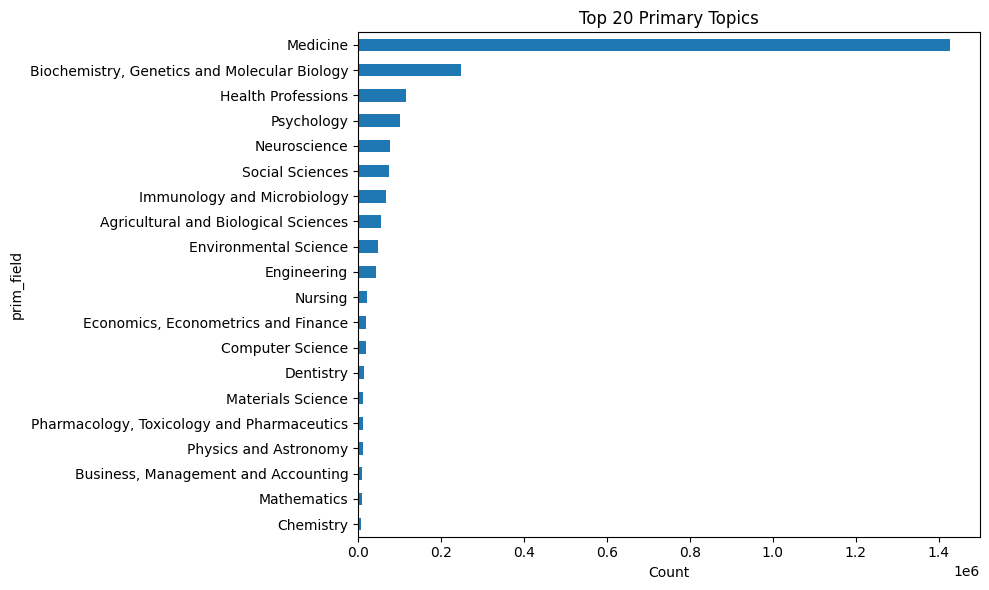

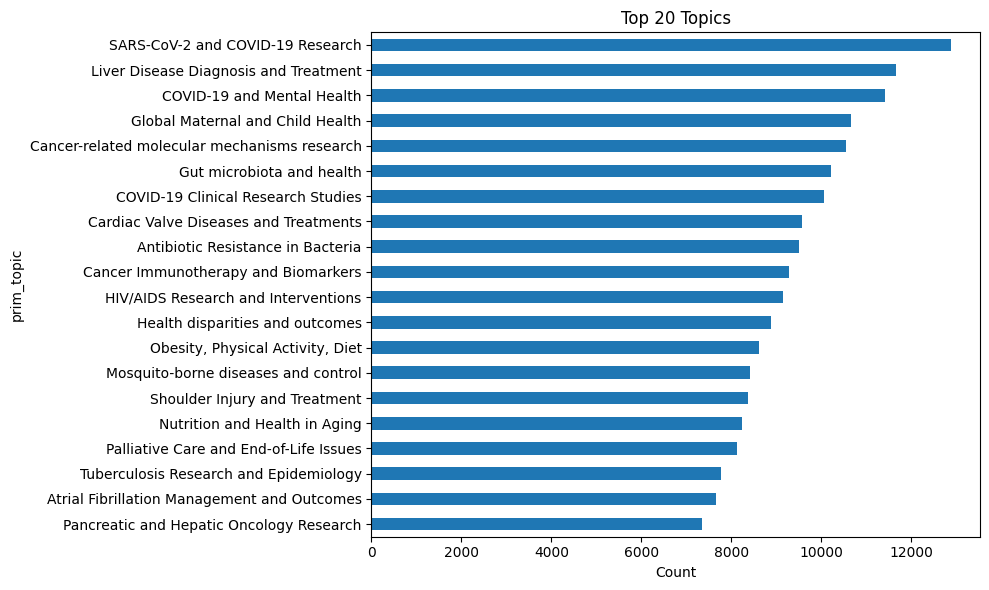

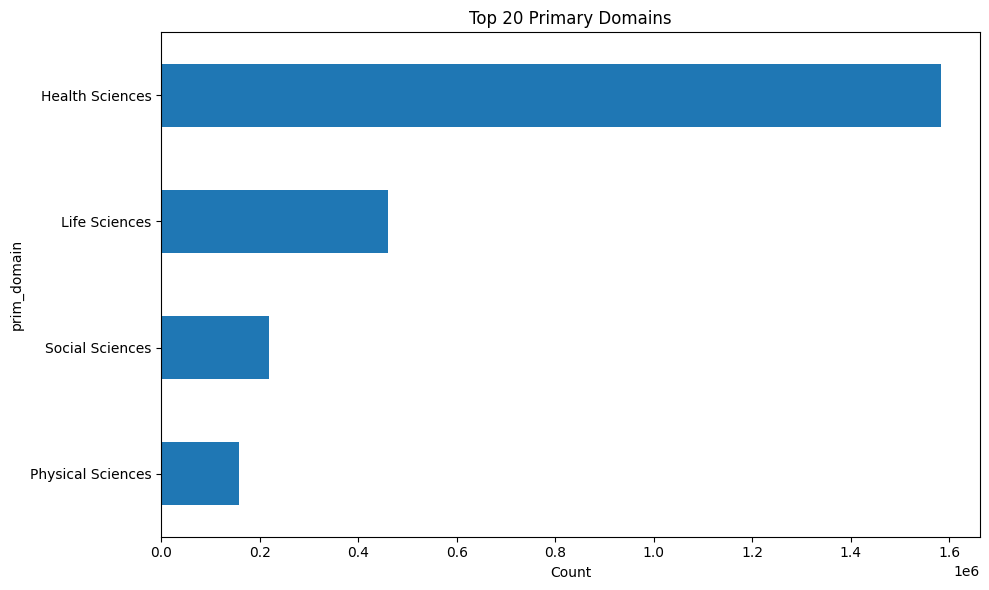

In [15]:
import matplotlib.pyplot as plt


# Step 2: Compute and sort top categories
top_topic = ddf['prim_topic'].value_counts().compute().nlargest(20).sort_values(ascending=True)
top_field = ddf['prim_field'].value_counts().compute().nlargest(20).sort_values(ascending=True)
top_domain = ddf['prim_domain'].value_counts().compute().nlargest(20).sort_values(ascending=True)

# Step 3: Plot sorted horizontal bar plots

plt.figure(figsize=(10, 6))
top_field.plot(kind='barh')
plt.title('Top 20 Primary Topics')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_topic.plot(kind='barh')
plt.title('Top 20 Topics')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_domain.plot(kind='barh')
plt.title('Top 20 Primary Domains')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


In [12]:
# Get unique values
unique_topics = ddf['prim_topic'].dropna().unique().compute().tolist()
unique_fields = ddf['prim_field'].dropna().unique().compute().tolist()
unique_domains = ddf['prim_domain'].dropna().unique().compute().tolist()

# Print them
print("All Unique Topics:")
print(unique_topics)

print("\nAll Unique Fields:")
print(unique_fields)

print("\nAll Unique Domains:")
print(unique_domains)

All Unique Topics:
['Cervical and Thoracic Myelopathy', 'Cancer Treatment and Pharmacology', 'Migraine and Headache Studies', 'Biochemical effects in animals', 'Prenatal Substance Exposure Effects', 'Muscle metabolism and nutrition', 'Atomic and Subatomic Physics Research', 'Gestational Trophoblastic Disease Studies', 'Transcranial Magnetic Stimulation Studies', 'Military and Defense Studies', 'Psychological and Educational Research Studies', 'Public health and occupational medicine', 'Artificial Intelligence in Games', 'Indian Economic and Social Development', 'Network Packet Processing and Optimization', 'High voltage insulation and dielectric phenomena', 'Architectural and Urban Studies', 'Microbial Natural Products and Biosynthesis', 'Freezing and Crystallization Processes', 'Genetic Neurodegenerative Diseases', 'Oil and Gas Production Techniques', 'Natural Compounds in Disease Treatment', 'Business, Innovation, and Economy', 'Construction Project Management and Performance', 'Robo

In [10]:
# List of fields to exclude (the ones you marked in red)
excluded_fields = [
    'Environmental Science', 'Veterinary', 'Decision Sciences',
    'Earth and Planetary Sciences', 'Psychology', 'Social Sciences', 'Nursing',
    'Agricultural and Biological Sciences', 'Health Professions',
    'Business, Management and Accounting', 'Energy', 'Materials Science',
    'Computer Science', 'Engineering', 'Mathematics',
    'Economics, Econometrics and Finance', 'Arts and Humanities',
    'Physics and Astronomy'
]

# Filter the Dask DataFrame to exclude the unwanted fields
ddf = ddf[~ddf['prim_field'].isin(excluded_fields)]

In [ ]:
# Instead, use len(ddf) for rows
n_rows = len(ddf)  # triggers computation
n_cols = len(ddf.columns)
print(f"Filtered Dask DataFrame shape: {n_rows} rows × {n_cols} columns")


Filtered Dask DataFrame shape: 1872146 rows × 63 columns


In [11]:
# Mark rows with missing abstract
ddf['missing_abstract'] = ddf['abstract_inverted_index'] == 'None'

In [12]:
# Filter
ddf = ddf[ddf['prim_domain'] != 'Social Sciences']

n_rows = len(ddf)  # triggers computation
n_cols = len(ddf.columns)
print(f"Filtered Dask DataFrame shape: {n_rows} rows × {n_cols} columns")


Filtered Dask DataFrame shape: 1872146 rows × 64 columns


In [ ]:
columns_to_drop = [
    'authorships',
    'best_oa_location',
    'biblio',
    'citation_normalized_percentile',
    'concepts',
    'doi_registration_agency',
    'fwci',
    'grants',
    'has_fulltext',
    'indexed_in',
    'is_paratext',
    'language_id',
    'open_access',
    'primary_location',
    'publication_date',
    'referenced_works_count',
    'summary_stats',
    'sustainable_development_goals'
]

ddf = ddf.drop(columns=columns_to_drop)

print(f"Estimated total size: {ddf.memory_usage(deep=True).sum().compute() / 1e6:.2f} MB")


Estimated total size: 16422.84 MB


In [14]:
import dask.dataframe as dd

# Repartition for parallelism 
ddf = ddf.repartition(npartitions=500)

# Drop duplicates by DOI
ddf = ddf.drop_duplicates(subset=["doi"])

# Optimize the computation graph to reduce complexity
ddf = ddf.optimize(fuse=True)

# Write to Parquet (multi-file, efficient)
ddf.to_parquet(
    "checkpoint_datacleaning",
    engine="pyarrow",
    compression="snappy",
    write_index=False
)


# [ignore this] checkpoint loading

In [1]:
import dask.dataframe as dd

# 1. Load the cleaned dataset that retains the DOIs
cleaned_ddf = dd.read_parquet("checkpoint_datacleaning", columns=["doi"])

# 2. Load raw dataset with only doi, id, and fwci columns
raw_ddf = dd.read_parquet("papers.parquet", columns=["doi", "id", "fwci"])

# 3. Filter raw_ddf to keep only rows where doi is in cleaned_ddf
doi_list = cleaned_ddf["doi"].dropna().drop_duplicates()
doi_list = doi_list.persist()  # force computation for efficiency

# Semi-join to get the matching records
mapping_ddf = raw_ddf.merge(doi_list.to_frame(), on="doi", how="inner")

# 4. Save the mapping file (lightweight)
mapping_ddf.to_parquet(
    "doi_id_fwci_mapping",
    engine="pyarrow",
    compression="snappy",
    write_index=False
)


# Cleaning (II): Labeling

In [ ]:
# Filter the Dask DataFrame
filtered_ddf = ddf[ddf['missing_abstract'] == False][['display_name', 'abstract_inverted_index']]

n_rows = filtered_ddf.shape[0].compute()
sample_fraction = 1000 / n_rows

# Sample and select columns
sampled = filtered_ddf.sample(frac=sample_fraction, random_state=42)[
    ['display_name', 'abstract_inverted_index']
]

# Bring result into memory
result_df = sampled.compute()

# Now sample_df is a Pandas DataFrame with the result
result_df.to_csv("sampled_data.csv", index=False)

In [ ]:
result_df.shape

(994, 2)

In [ ]:
import pandas as pd

# Aging-related terms
aging_terms = ['aging', 'ageing', 'gerontology', 'senescence', 'longevity']

# Function to check if text contains any aging-related terms
def contains_aging_terms(text):
    if not isinstance(text, str):
        return False
    text = text.lower()
    return any(term in text for term in aging_terms)

# Filter to entries with available abstracts
filtered_ddf = ddf[ddf["missing_abstract"] == False]

# Further filter by presence of aging terms in title or prim_topic
aging_ddf = filtered_ddf[
    filtered_ddf['prim_topic'].map(contains_aging_terms, meta=('prim_topic', 'bool')) |
    filtered_ddf['title'].map(contains_aging_terms, meta=('title', 'bool'))
]

# Count matching rows
n_aging = aging_ddf.shape[0].compute()
print(f"Number of aging-related papers with abstract: {n_aging}")


Number of aging-related papers with abstract: 20625


In [ ]:
# Calculate sample fraction for ~500 rows
sample_frac = min(1.0, 500 / n_aging)

# Sample using fraction
aging_sampled = aging_ddf[['display_name', 'abstract_inverted_index']].sample(
    frac=sample_frac, random_state=42
).compute()

# Combine with the existing result_df
combined_df = pd.concat([result_df, aging_sampled], ignore_index=True)

# Save to CSV
combined_df.to_csv("sampled_data_with_aging.csv", index=False)


In [ ]:
combined_df.head()

,display_name,abstract_inverted_index
0,Hydrogel Microneedles with Programmed Mesophas...,"{'Microneedle-based': [0], 'drug': [1, 44, 212..."
1,Primary intestinal lymphangiectasia with lymph...,"{'Primary': [0], 'intestinal': [1, 19], 'lymph..."
2,Hermansky-Pudlak Syndrome Complicated by Crohn...,"{'ABSTRACT': [0], 'Hermansky-Pudlak': [1], 'sy..."
3,Performance Comparison of Liquid Chromatograph...,"{'Kinase': [0], 'inhibitors': [1, 43], 'are': ..."
4,Prophylaxis vs preemptive therapy in preventio...,"{'Abstract': [0], 'Cytomegalovirus': [1], '(CM..."


In [ ]:
import ast
import re

def process_inverted_index_string(inverted_index_str):
    # Step 1: Convert the string to a Python dictionary safely
    inverted_index = ast.literal_eval(inverted_index_str)

    # Step 2: Build a list of (position, word) pairs
    position_word_pairs = []
    for word, positions in inverted_index.items():
        for pos in positions:
            position_word_pairs.append((pos, word))

    # Step 3: Sort by position
    position_word_pairs.sort()

    # Step 4: Extract words into a list and join into a string
    words = [word for _, word in position_word_pairs]
    text = ' '.join(words)

    # Step 5: Clean up spacing before punctuation
    text = re.sub(r'\s([?.!,;:])', r'\1', text)

    return text


In [ ]:
string = """
{'Objectivesa\x80\x80The': [0], 'COVID-19': [1, 62, 169], 'pandemic': [2], 'spread': [3, 60], 'rapidly': [4], 'across': [5], 'the': [6, 9, 32, 56, 59, 71, 78, 96, 99, 117, 123, 134, 163, 166, 171, 174, 185, 246, 260, 267, 276, 283, 288, 310, 343, 346, 355, 359, 364, 373, 376, 384], 'globe': [7], 'during': [8, 77, 170], 'first': [10], 'half': [11], 'of': [12, 18, 34, 61, 80, 98, 129, 136, 145, 165, 168, 201, 245, 248, 367, 378, 386], '2020.': [13], 'In': [14], 'Japan,': [15], 'a': [16, 28], 'state': [17], 'emergency': [19], 'was': [20, 84, 114, 181, 263, 279, 298, 306, 319, 351], 'declared': [21], 'on': [22, 31, 39, 116, 139, 184], 'April': [23, 87], '7,': [24], '2020,': [25, 91], 'which': [26, 121, 132], 'had': [27], 'significant': [29, 299], 'impact': [30], 'life': [33], 'citizens.': [35], 'This': [36], 'study': [37, 112, 229], 'focused': [38], 'behaviors': [40, 76, 146, 224], 'like': [41, 147], 'avoiding': [42, 148, 249], 'going': [43, 149, 250], 'out': [44, 150, 251], 'or': [45, 151, 252, 317], 'coming': [46, 152, 253], 'in': [47, 66, 109, 153, 254, 358, 391], 'contact': [48, 154, 255], 'with': [49, 74, 155, 222, 256, 266, 282, 309, 342, 354], 'others': [50, 156, 212, 257], 'and': [51, 58, 103, 126, 157, 199, 209, 296, 334, 363], 'frequent': [52, 158], 'hand-washing': [53, 326], 'to': [54, 89, 372], 'prevent': [55], 'infection': [57], 'among': [63, 101], 'people': [64], 'living': [65, 108], 'Tokyo.': [67, 110], 'We': [68], 'also': [69], 'examined': [70], 'factors': [72], 'associated': [73, 265, 281, 308, 341, 353], 'these': [75, 223, 387], 'declaration': [79, 97], 'emergency.Methodsa\x80\x80An': [81], 'online': [82], 'survey': [83], 'conducted': [85, 324], 'from': [86], '26': [88], '29,': [90], 'approximately': [92], '20': [93], 'days': [94], 'after': [95], 'emergency,': [100], 'men': [102], 'women': [104], 'aged': [105], '20-69': [106], 'years': [107], 'The': [111, 143, 243, 380], 'framework': [113], 'based': [115, 183], 'protection': [118, 360], 'motivation': [119, 361], 'theory,': [120], 'explains': [122, 133], 'risk-reducing': [124], 'behaviors,': [125], 'focus': [127, 365], 'theory': [128, 362, 366], 'normative': [130, 368], 'conduct,': [131], 'effect': [135], "others'": [137], 'behavior': [138, 268, 284, 311, 327, 374], "one's": [140], 'own': [141], 'behavior.': [142], 'frequency': [144, 247], 'hand-washing,': [159], 'as': [160, 162, 225], 'well': [161, 211], 'perception': [164, 305], 'risk': [167, 292, 304], 'week': [172], 'preceding': [173], 'survey,': [175], 'were': [176, 227, 339, 370], 'assessed.': [177], 'Each': [178], 'preventive': [179], 'action': [180], 'evaluated': [182], 'following': [186], 'factors:': [187], 'perceived': [188, 192], 'effectiveness': [189], '(response': [190, 197], 'efficacy),': [191], 'practicability': [193], '(self-efficacy),': [194], 'necessary': [195], 'cost': [196, 348], 'cost),': [198], 'perceptions': [200], 'how': [202, 210], 'much': [203], 'should': [204], 'be': [205], 'done': [206], '(injunctive': [207], 'norm)': [208], 'are': [213], 'doing': [214], 'it': [215], '(descriptive': [216], 'norm).': [217], 'Hierarchical': [218], 'multiple': [219], 'regression': [220, 271], 'analysis': [221, 323], 'outcomes': [226], 'performed.Resultsa\x80\x80This': [228], 'included': [230], '1,034': [231], 'participants': [232], '(50.3%': [233], 'male,': [234], 'mean': [235], 'age': [236], '44.82': [237], 'years,': [238], 'standard': [239], 'deviation': [240], '14.00': [241], 'years).': [242], 'analyses': [244], 'showed': [258], 'that': [259, 303, 329, 383], 'injunctive': [261, 330], 'norm': [262, 278, 331], 'positively': [264, 307, 340], '(standardized': [269], 'partial': [270], 'coefficient': [272], '(s)=0.343,': [273], 'P<0.001),': [274, 301], 'while': [275, 345], 'descriptive': [277], 'negatively': [280, 352], '(s=-0.074,': [285], 'P=0.010).': [286], 'Furthermore,': [287], 'two-way': [289], 'interaction': [290], 'between': [291], 'perception,': [293], 'response': [294, 315, 335, 347], 'efficacy,': [295], 'self-efficacy': [297, 318], '(s=0.129,': [300], 'indicating': [302], 'only': [312], 'when': [313], 'either': [314], 'efficacy': [316, 336], 'low.': [320], 'A': [321], 'similar': [322], 'for': [325, 375], 'revealed': [328], '(s=0.256,': [332], 'P<0.001)': [333, 338, 350], '(s=0.132,': [337], 'behavior,': [344], '(s=-0.193,': [349], 'behavior.Conclusiona\x80\x80Some': [356], 'variables': [357], 'conduct': [369], 'related': [371], 'prevention': [377], 'COVID-19.': [379], 'results': [381], 'suggest': [382], 'application': [385], 'theories': [388], 'is': [389], 'useful': [390], 'future': [392], 'studies.': [393]}
"""

process_inverted_index_string(string)

"Objectivesa\x80\x80The COVID-19 pandemic spread rapidly across the globe during the first half of 2020. In Japan, a state of emergency was declared on April 7, 2020, which had a significant impact on the life of citizens. This study focused on behaviors like avoiding going out or coming in contact with others and frequent hand-washing to prevent the infection and the spread of COVID-19 among people living in Tokyo. We also examined the factors associated with these behaviors during the declaration of emergency.Methodsa\x80\x80An online survey was conducted from April 26 to 29, 2020, approximately 20 days after the declaration of the emergency, among men and women aged 20-69 years living in Tokyo. The study framework was based on the protection motivation theory, which explains the risk-reducing behaviors, and focus theory of normative conduct, which explains the effect of others' behavior on one's own behavior. The frequency of behaviors like avoiding going out or coming in contact wi

In [ ]:
import os
from openai import OpenAI
import pandas as pd
import time
from tqdm import tqdm
import private_info


client = OpenAI(
    api_key=private_info.openAI_api_key
)

def create_prompt(title,abstract_str):
    prompt = f"""
        You are a classifier. I will give you an abstract and a title.

        Definitions:
        - "Medical research" refers to research that investigates human biology, disease, clinical interventions, health outcomes, or public health—typically conducted in the context of biomedical or health sciences.
        - "Aging research" refers to studies that explicitly examine biological, clinical, or systemic aspects of aging. This includes physiological aging, age-related disease, elder care models, or aging-targeted interventions. Do not classify research as aging-related merely because it involves older adults.

        Your tasks:
        1. Classify the content as one of: "medical research", "non-medical research", or "uncertain".
        2. Classify the content as one of: "aging research", "non-aging research", or "uncertain".
        3. Provide a short note (1 sentence, as short as possible) to justify both classifications.

        Output only a valid JSON object with these fields:
        - "label": medical classification
        - "aging": aging classification
        - "note": a one-sentence explanation

        Only return valid JSON. Abstract: {process_inverted_index_string(abstract_str)}; Title: {title}
        """


    return prompt


In [ ]:
create_prompt("hehe",string)

'\n        You are a classifier. I will give you an abstract.\n\n        Your tasks:\n        1. Classify the abstract as one of: "medical research", "non-medical research", or "uncertain".\n        2. Categorize the content into one primary topic area from the list below (choose only one):\n        - "Aging & Longevity" (use this only if the aging process or lifespan extension is the main research focus—not just elderly subjects)\n        - "Cancer & Oncology"\n        - "Cardiometabolic Diseases"\n        - "Neurology & Psychiatry"\n        - "Infectious & Public Health"\n        - "Respiratory & Critical Care"\n        - "Digestive & Liver Health"\n        - "Reproductive & Developmental Health"\n        - "Other"\n\n        Output only a **valid JSON** object with these fields:\n        - "label": one of the three research categories\n        - "category": the one most relevant topic area\n        - "reason": a one-sentence explanation (very brief)\n\n        Only return valid JSON

In [ ]:
import json
import time
import pandas as pd
from tqdm import tqdm
from pydantic import BaseModel

# Define the schema for structured output
class ClassificationResult(BaseModel):
    label: str      # medical classification
    aging: str      # aging classification
    note: str       # brief justification

# Collect structured outputs here
final_results = []

# Main loop with progress bar
for i, row in tqdm(combined_df.iterrows(), total=len(combined_df)):
    try:
        title = row["display_name"]
        abstract_str = row["abstract_inverted_index"]
        reconstructed_abstract = process_inverted_index_string(abstract_str)

        # Build prompt using your updated template
        prompt = create_prompt(title, abstract_str)

        # Structured output request
        response = client.chat.completions.create(
            model="gpt-4.1",
            messages=[
                {"role": "system", "content": "You are a concise and accurate research classifier."},
                {"role": "user", "content": prompt}
            ],
            response_format={
                "type": "json_schema",
                "json_schema": {
                    "name": "classification",
                    "schema": ClassificationResult.model_json_schema()
                }
            },
            temperature=0,
            max_tokens=500
        )

        # Parse response (still returned as JSON string)
        parsed = json.loads(response.choices[0].message.content)

        final_results.append({
            "id": i,
            "title": title,
            "abstract": reconstructed_abstract,
            "label": parsed["label"],
            "aging": parsed["aging"],
            "note": parsed["note"]
        })

        time.sleep(1)

    except Exception as e:
        final_results.append({
            "id": i,
            "title": row.get("display_name"),
            "abstract": process_inverted_index_string(row["abstract_inverted_index"]),
            "label": "ERROR",
            "aging": None,
            "note": str(e)
        })

# Create final DataFrame
final_df = pd.DataFrame(final_results)


100%|██████████| 1497/1497 [1:01:35<00:00,  2.47s/it]


In [ ]:
final_df.head()

,id,title,abstract,label,aging,note
0,0,Hydrogel Microneedles with Programmed Mesophas...,Microneedle-based drug delivery offers an attr...,medical research,non-aging research,This is medical research on drug delivery tech...
1,1,Primary intestinal lymphangiectasia with lymph...,"Primary intestinal lymphangiectasia (PIL), als...",medical research,non-aging research,This is a case report of a rare disease in a y...
2,2,Hermansky-Pudlak Syndrome Complicated by Crohn...,ABSTRACT Hermansky-Pudlak syndrome (HPS) is a ...,medical research,non-aging research,This is a case report on rare immune disorders...
3,3,Performance Comparison of Liquid Chromatograph...,Kinase inhibitors are small-molecule drugs des...,medical research,non-aging research,This study evaluates drug monitoring methods i...
4,4,Prophylaxis vs preemptive therapy in preventio...,"Abstract Cytomegalovirus (CMV), the beta-human...",medical research,non-aging research,This is medical research on CMV prevention in ...


In [ ]:
# Get existing display_names in combined_df to avoid duplicates
existing_titles = set(combined_df["display_name"])

# Remove overlapping papers from aging_ddf
non_overlapping_aging_ddf = aging_ddf[~aging_ddf["display_name"].isin(existing_titles)]

# Calculate sampling fraction for ~500 rows
available_rows = non_overlapping_aging_ddf.shape[0].compute()
sample_frac = min(1.0, 500 / available_rows)

# Sample using fraction
new_aging_sample = non_overlapping_aging_ddf[
    ['display_name', 'abstract_inverted_index']
].sample(frac=sample_frac, random_state=42).compute()


In [ ]:
new_aging_sample.head()

,display_name,abstract_inverted_index
12781,Magnetic Resonance Imaging Appearance of Giant...,"{'Background:': [0], 'Giant': [1], 'intracereb..."
299,Design and fabrication of a 3D–printed oral st...,"{'Oral': [0], 'stents': [1, 31, 83], 'have': [..."
11129,Effect of Image Resolution and Compression on ...,"{'Fractal': [0], 'dimension': [1, 61], '(FD)':..."
6857,Time difference for the presence of coronary c...,"{'Coronary': [0], 'artery': [1], 'calcium': [2..."
159,Manual for clinical language tractography,"{'We': [0], 'introduce': [1], 'a': [2, 150], '..."


In [ ]:
new_aging_sample.shape

(502, 2)

In [ ]:
# Collect structured outputs here
final_results = []

# Main loop with progress bar
for i, row in tqdm(new_aging_sample.iterrows(), total=len(new_aging_sample)):
    try:
        title = row["display_name"]
        abstract_str = row["abstract_inverted_index"]
        reconstructed_abstract = process_inverted_index_string(abstract_str)

        # Build prompt using your updated template
        prompt = create_prompt(title, abstract_str)

        # Structured output request
        response = client.chat.completions.create(
            model="gpt-4.1",
            messages=[
                {"role": "system", "content": "You are a concise and accurate research classifier."},
                {"role": "user", "content": prompt}
            ],
            response_format={
                "type": "json_schema",
                "json_schema": {
                    "name": "classification",
                    "schema": ClassificationResult.model_json_schema()
                }
            },
            temperature=0,
            max_tokens=500
        )

        # Parse response (still returned as JSON string)
        parsed = json.loads(response.choices[0].message.content)

        final_results.append({
            "id": i,
            "title": title,
            "abstract": reconstructed_abstract,
            "label": parsed["label"],
            "aging": parsed["aging"],
            "note": parsed["note"]
        })

        time.sleep(1)

    except Exception as e:
        final_results.append({
            "id": i,
            "title": row.get("display_name"),
            "abstract": process_inverted_index_string(row["abstract_inverted_index"]),
            "label": "ERROR",
            "aging": None,
            "note": str(e)
        })

# Create final DataFrame
new_aging_df = pd.DataFrame(final_results)

final_df = pd.concat([final_df, new_aging_df], ignore_index=True)

100%|██████████| 502/502 [20:42<00:00,  2.48s/it]


In [ ]:
final_df.shape


(1999, 6)

In [ ]:
final_df.to_csv('label_training.csv')

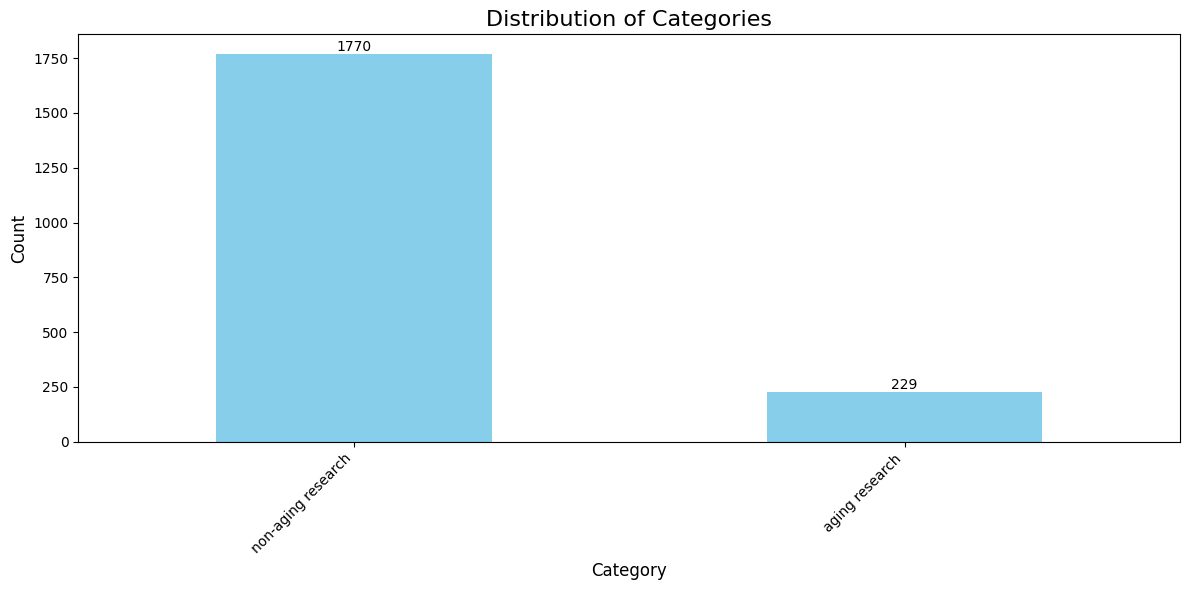

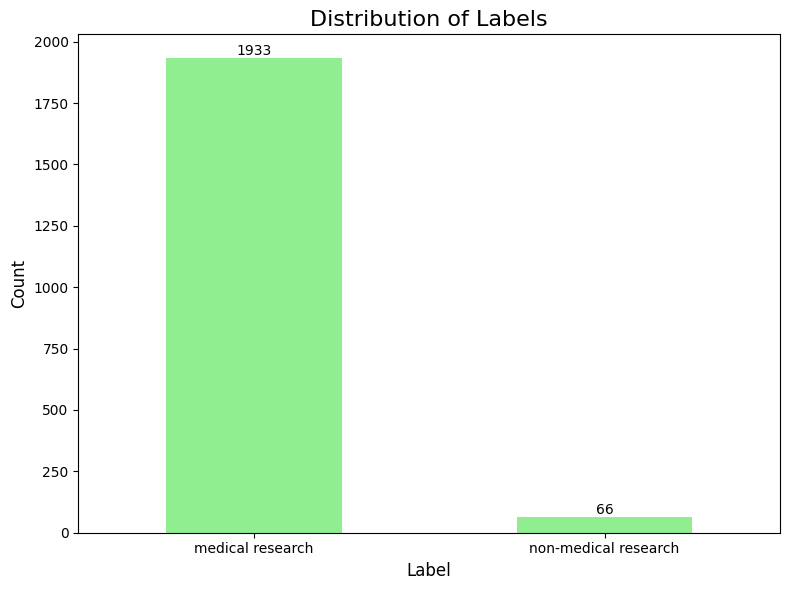

In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of 'aging'
plt.figure(figsize=(12, 6))
ax1 = final_df['aging'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add count labels on bars
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Plot distribution of 'label'
plt.figure(figsize=(8, 6))
ax2 = final_df['label'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Labels', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Add count labels on bars
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
